In [130]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import re
import os
from dotenv import load_dotenv

In [131]:
load_dotenv(dotenv_path ="laptop.env" , override =True)

True

In [132]:
data_path = os.getenv("file_path")

In [133]:
df = pd.read_csv(data_path)

In [134]:
df.head(5)

,Title,Brand,Screen_Size,CPU_Model,Ram,Operating_System,Rating,Series,Color,Resolution,Weight,USB,Battery,Graphics,Disk_size,Card_desc,Price
0,Microsoft Surface Laptop Intel Core i5 7th Gen...,Microsoft,13.5 Inches,1.2GHz Cortex A8 Processor,8 GB,Windows 10,4.4,Intel,Platinum,NaN,NaN,NaN,NaN,Intel HD Graphics 620,256 GB,Integrated,NaN
1,"Microsoft Surface Laptop 3 13.5"" Touch-Screen ...",Microsoft,13.5 Inches,Core i5,8 GB,Windows 10,4.4,Microsoft Surface,Matte Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Microsoft Surface Laptop (Intel Core i7, 16GB ...",Microsoft,13.5 Inches,Core i7,16 GB,Windows 10 S,3.9,Surface Laptop,Platinum,NaN,NaN,NaN,NaN,Intel Iris Plus Graphics 640,512 GB,Integrated,NaN
3,"Microsoft Surface Laptop 3, 10th Gen Intel Cor...",Microsoft,13 Inches,Core i5-1035G7,8 GB,Windows 10 Home,4.2,Surface Laptop 3,Cobalt Blue,NaN,NaN,NaN,NaN,Intel Iris Plus,NaN,Integrated,NaN
4,"2022 Microsoft Surface Laptop Go 12.4"" Touchsc...",Microsoft,12.4 Inches,Core i5,4 GB,Windows 11 Pro,3.9,Surface Laptop Go,Silver,NaN,NaN,NaN,NaN,NaN,256 GB,Integrated,$359.99


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             2843 non-null   object 
 1   Brand             2810 non-null   object 
 2   Screen_Size       2756 non-null   object 
 3   CPU_Model         2628 non-null   object 
 4   Ram               2711 non-null   object 
 5   Operating_System  2723 non-null   object 
 6   Rating            2283 non-null   float64
 7   Series            2501 non-null   object 
 8   Color             2109 non-null   object 
 9   Resolution        182 non-null    object 
 10  Weight            66 non-null     object 
 11  USB               35 non-null     float64
 12  Battery           7 non-null      object 
 13  Graphics          2063 non-null   object 
 14  Disk_size         2248 non-null   object 
 15  Card_desc         2635 non-null   object 
 16  Price             1863 non-null   object 


# 🧹 Data Cleaning Steps

This document summarizes the steps taken to clean the laptop dataset.

---

#### ✅ 1. Dropped Rows with Critical Missing Data  
Removed rows that had missing values in key columns such as brand, screen size, RAM, disk size, graphics, and CPU model.

---

#### ✅ 2. Filled Missing Ratings  
Replaced all missing values in the Rating column with 0, assuming no rating was provided.

---

#### ✅ 3. Converted RAM, Disk Size, and Screen Size to Numeric  
Extracted numeric values from the RAM, disk size, and screen size columns and converted them into float data types for consistency.

---

#### ✅ 4. Cleaned and Converted the Price Column  
Removed currency symbols and converted the Price column to float.

---

#### ✅ 5. Imputed Missing Price Values  
Filled missing prices using the average price within each group defined by RAM, disk size, and CPU model. For any remaining missing prices, filled them using the overall mean.

---

#### ✅ 6. Cleaned the Title Column  
Formatted the Title column to title case, removed special characters, and standardized screen size text from "in" to "inch".

---

#### ✅ 7. Renamed Columns for Clarity  
Renamed technical column names (like Ram and Price) to more descriptive ones, such as RAM_GB and Price_USD.

---

#### 📌 Final Note  
The dataset is now cleaned, standardized, and ready for analysis or modeling.


 

In [136]:
df = df.drop(columns=["Resolution", "Weight", "USB", "Battery" , "Card_desc" , "Color","Series","Operating_System"])


In [137]:
df = df.dropna(subset=['Screen_Size','Ram','Disk_size','Graphics' , 'CPU_Model'])
df.isna().sum()

Title            0
Brand            1
Screen_Size      0
CPU_Model        0
Ram              0
Rating         294
Graphics         0
Disk_size        0
Price          616
dtype: int64

In [138]:
df['Brand'] = df['Brand'].fillna(df['Title'].str.split().str[0])


In [139]:
df.sample(5)

,Title,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price
900,"MSI Creator M16 16"" Content Creation Laptop: I...",MSI,16,Core i7,32 GB,4.2,NVIDIA GeForce RTX 3060,1 TB,$870.00
220,"MSI GF65 Thin 15.6"" 120Hz FHD Gaming Laptop In...",MSI,15.6 Inches,Core i7 Family,8 GB,4.4,NVIDIA GeForce GTX,512 GB,$689.98
23,"Panasonic Toughbook CF-54 MK2 Intel i7, 6th Ge...",Toughbook,14 Inches,Core i7 6600U,16 GB,NaN,Intel,1 TB,NaN
2209,"Samsung High Performance Chromebook computer, ...",SAMSUNG,11.6 Inches,Celeron N3060,4 GB,4.3,Intel HD Graphics 400,32 GB,$278.00
410,HP Chromebook Laptop Student Business (2022 Mo...,HP,11.6 Inches,AMD A Series,4 GB,4.5,AMD Radeon R3,32 GB,$179.00


In [140]:
df['Rating'] = df['Rating'].fillna(0)

In [141]:
df['Ram'] = df['Ram'].astype(str).str.extract(r'(\d+)').astype(float)
df['Disk_size'] = df['Disk_size'].astype(str).str.extract(r'(\d+)').astype(float)
df['Screen_Size']=df['Screen_Size'].astype(str).str.extract(r'(\d+)').astype(float)

In [142]:
df['Brand'].unique()


array(['Microsoft', 'HP', 'Dell', 'Alienware', 'EXCaliberPC', 'GIGABYTE',
       'Panasonic', 'MSI', 'Toughbook', 'Apple', 'Lenovo', 'VGKE', 'Acer',
       'WAKST', 'Fusion5', 'TECLAST', 'Panasonic Toughbook CF-31 Rugged',
       'Bmax', 'ASUS', 'CHUWI', 'SAMSUNG', 'LG', 'HYUNDAI', 'Broage',
       'Generic', 'Razer', 'HP Tuners', 'Unknown', 'Best Notebooks',
       'DERE', 'REPOWER REPAIR REFURBISH REUSE', 'Artist Unknown',
       'LincPlus', 'Carlisle Paddles', 'Coolby'], dtype=object)

In [143]:
df = df[df['Brand'] != 'Unknown']


In [144]:
df.isna().sum()

Title            0
Brand            0
Screen_Size      0
CPU_Model        0
Ram              0
Rating           0
Graphics         0
Disk_size        0
Price          616
dtype: int64

In [145]:
df['Price'] = df['Price'].replace(r'[\$,]', '', regex=True).astype(float)


In [146]:
# 1. Calculate IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# 2. Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Remove rows with Price outside the bounds
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]


In [147]:
df['Price'] = df.groupby(['Ram','Disk_size','Brand'])['Price'].transform(lambda x: x.fillna(x.mean()))


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1042 entries, 7 to 2841
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        1042 non-null   object 
 1   Brand        1042 non-null   object 
 2   Screen_Size  1042 non-null   float64
 3   CPU_Model    1042 non-null   object 
 4   Ram          1042 non-null   float64
 5   Rating       1042 non-null   float64
 6   Graphics     1042 non-null   object 
 7   Disk_size    1042 non-null   float64
 8   Price        1042 non-null   float64
dtypes: float64(5), object(4)
memory usage: 81.4+ KB


In [149]:
df.isna().sum()

Title          0
Brand          0
Screen_Size    0
CPU_Model      0
Ram            0
Rating         0
Graphics       0
Disk_size      0
Price          0
dtype: int64

In [150]:
df = df.dropna(subset=['Price'])


In [151]:
df = df[df['Ram'] >=2]
df = df[df['Rating'] <= 5]
df = df[(df['Disk_size'].isin([128, 256, 512, 1024])) | (df['Disk_size'] > 1024)]

In [152]:
df['Title'] = df['Title'].str.title().str.replace(r'[^\w\s.]', '', regex=True)


In [153]:
df['Title'] = df['Title'].str.title().str.replace(r'(\d{2})in', r'\1 inch', regex=True)


In [154]:
df['Brand'] = df['Brand'].astype(str).str.strip().str.split().str[0]


In [155]:
df.rename(columns={'Ram': 'RAM_GB', 'Screen_Size': 'Screen_Size_inch' , 'Disk_size' : 'Disk_size_GB' , 'Price' : 'Price_USD'}, inplace=True)


In [156]:
df

,Title,Brand,Screen_Size_inch,CPU_Model,RAM_GB,Rating,Graphics,Disk_size_GB,Price_USD
7,Dell Latitude 3510 Business Laptop Black Intel...,Dell,15.0,Intel Core i5-1135G7,16.0,4.3,Intel UHD Graphics,256.0,818.00
11,Excaliberpc 2022 Msi Pulse Gl76 12Ugk256 I7127...,EXCaliberPC,17.0,Intel Core i7,16.0,4.1,NVIDIA GeForce RTX 3070,512.0,1699.00
17,Excaliberpc 2022 Asus Rog Strix Scar 15 G533Zm...,EXCaliberPC,15.0,Intel Core i9,16.0,5.0,NVIDIA GeForce RTX 3060,512.0,1799.00
19,Gigabyte A5 X1 15.6 Fhd Ips Antiglare 240Hz ...,GIGABYTE,15.0,AMD Ryzen 9 5900X,16.0,4.1,NVIDIA GeForce RTX 3070,512.0,1399.00
46,Excaliberpc 2022 Msi Prestige 14 A12Sc010 I512...,EXCaliberPC,14.0,Intel Core i5,16.0,3.0,NVIDIA GeForce GTX 1650,512.0,1099.00
...,...,...,...,...,...,...,...,...,...
2812,Samsung Galaxy Chromebook 2 Xe530Qdaka1Us 13.3...,SAMSUNG,13.0,Core i3,8.0,4.4,Intel UHD Graphics,128.0,499.00
2829,Microsoft Surface Laptop Go 2 12.4 Touchscree...,Microsoft,12.0,Intel Core i5,8.0,4.5,Intel HD Graphics 520,256.0,709.99
2831,Microsoft Surface Laptop Go 12.4 Touchscreen I...,Microsoft,12.0,Intel Core i5,4.0,4.8,Intel UHD Graphics,128.0,299.99
2835,Microsoft Surface Laptop Studio 14.4 Touchscre...,Microsoft,14.0,Intel Core i7,16.0,1.0,NVIDA GeForce RTX 3050Ti,512.0,1999.99


# 📈 Laptop Dataset Analysis

This document outlines key ideas and suggestions for analyzing the laptop dataset to extract valuable insights.

---

#### 🔍 1. Descriptive Statistics & Distributions

- Explore the distribution of **Price** using boxplots to detect outliers and pricing patterns.
- Analyze the **Rating** distribution to understand user satisfaction levels.

---

#### 📊 2. Brand-Level Analysis

- Calculate the **average price per brand** to find premium and budget brands.
- Compute the **average rating per brand** to evaluate brand reputation.

---

#### 💾 4. Hardware Specs Analysis

- Investigate if **more RAM leads to higher price**.
- Compare **Disk Size** against price to see storage cost trends.
---

#### 📌 Summary

These steps provide a comprehensive roadmap for exploring and analyzing the laptop dataset. With the right visualizations and groupings, you can uncover trends, pricing strategies, and product positioning across brands and specs.


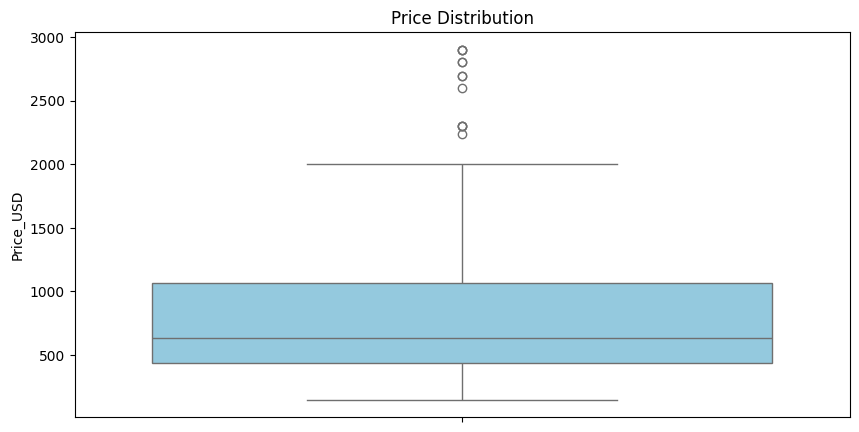

In [157]:
plt.figure(figsize=(10, 5))
sns.boxplot(df['Price_USD'], color='skyblue')
plt.title('Price Distribution')
plt.show()

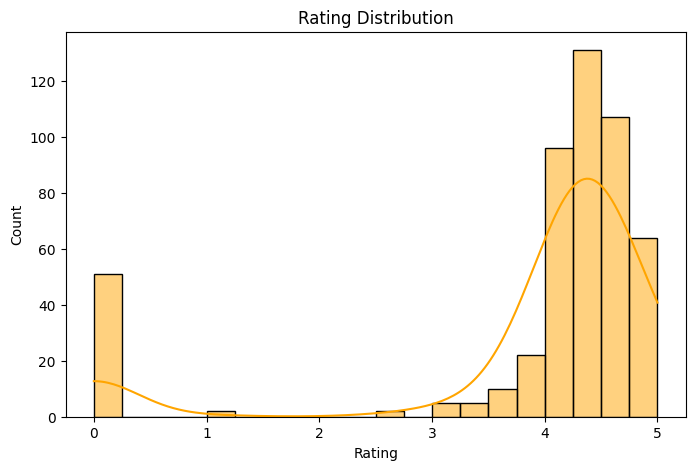

In [158]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], kde=True, bins=20, color='orange')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


C:\Users\usrr\AppData\Local\Temp\ipykernel_3308\255957456.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_avg_price.values, y=brand_avg_price.index, palette='viridis')


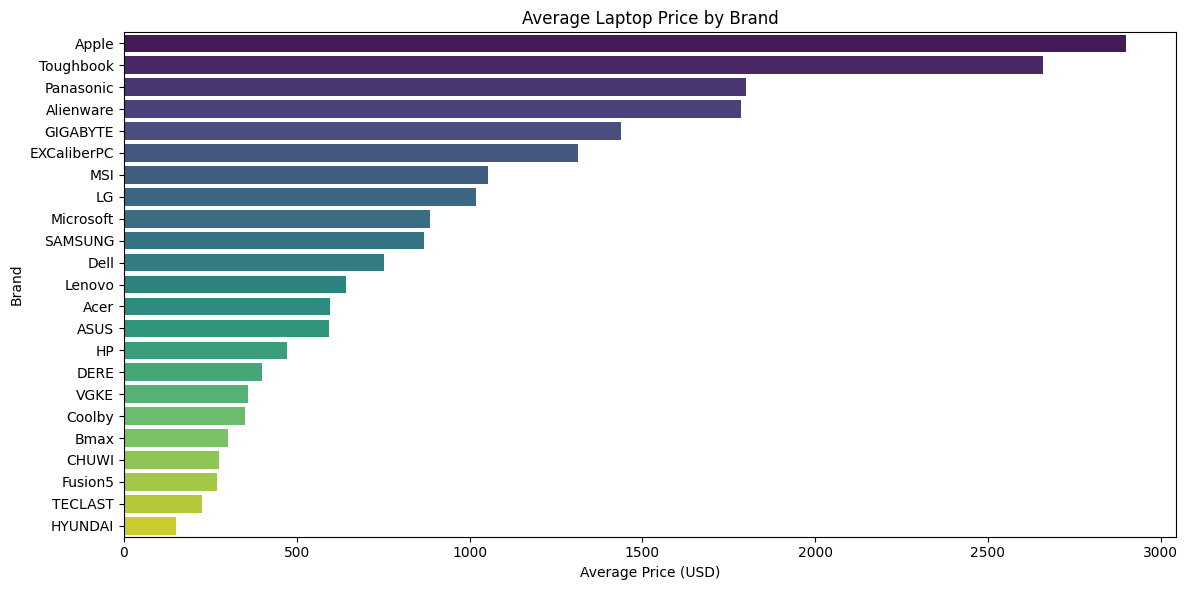

In [159]:
# Calculate average price per brand
brand_avg_price = df.groupby('Brand')['Price_USD'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=brand_avg_price.values, y=brand_avg_price.index, palette='viridis')
plt.title('Average Laptop Price by Brand')
plt.xlabel('Average Price (USD)')
plt.ylabel('Brand')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



C:\Users\usrr\AppData\Local\Temp\ipykernel_3308\1613077475.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_avg_rating.values, y=brand_avg_rating.index, palette='mako')


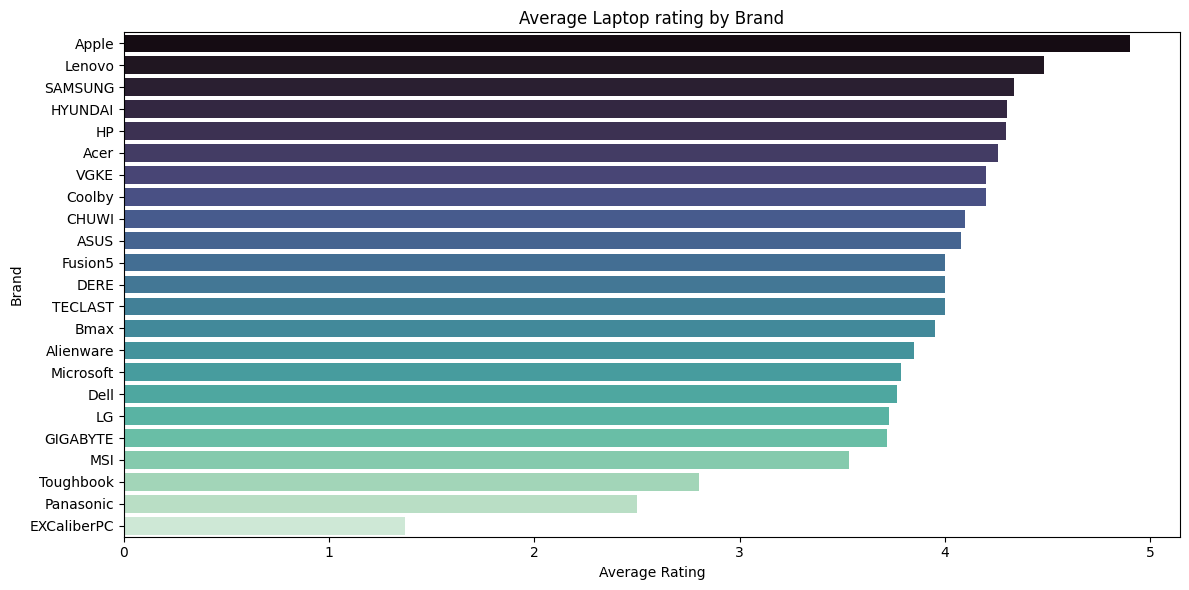

In [160]:
brand_avg_rating = df.groupby('Brand')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=brand_avg_rating.values, y=brand_avg_rating.index, palette='mako')
plt.title('Average Laptop rating by Brand')
plt.xlabel('Average Rating')
plt.ylabel('Brand')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\usrr\AppData\Local\Temp\ipykernel_3308\2998330220.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ram_price.index, y=ram_price.values, palette='Blues_d')


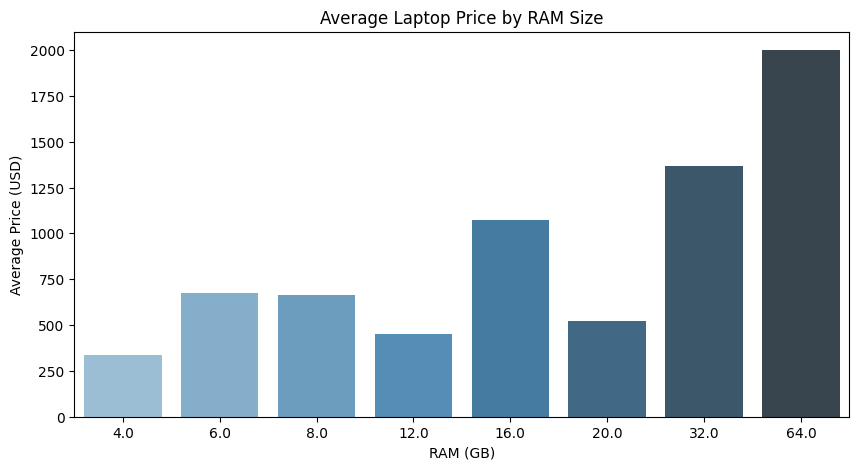

In [161]:
ram_price = df.groupby('RAM_GB')['Price_USD'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=ram_price.index, y=ram_price.values, palette='Blues_d')
plt.title('Average Laptop Price by RAM Size')
plt.xlabel('RAM (GB)')
plt.ylabel('Average Price (USD)')
plt.show()





C:\Users\usrr\AppData\Local\Temp\ipykernel_3308\3139673222.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Disk_price.index, y=Disk_price.values, palette='Blues_d')


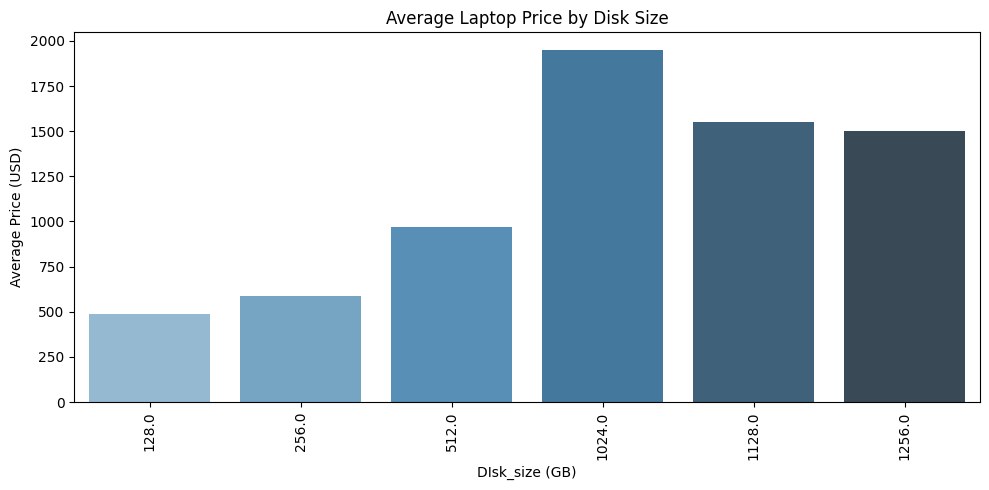

In [162]:
Disk_price = df.groupby('Disk_size_GB')['Price_USD'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=Disk_price.index, y=Disk_price.values, palette='Blues_d')
plt.title('Average Laptop Price by Disk Size')
plt.xlabel('DIsk_size (GB)')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()